In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


# Data Cleaning


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop last 3 columns  as most of values are null
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
# renaming col
df.rename(columns={'v1':"Target",'v2':"Text"},inplace =True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['Target']=encoder.fit_transform(df['Target'])
df.head()
# 0-ham 1- spam

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing values checking
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [10]:
df= df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(5169, 2)


# EDA

In [13]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

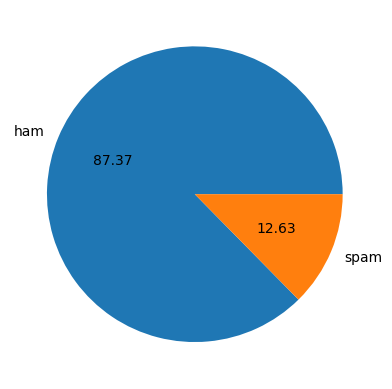

In [14]:
## dataset is imbalanced
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [15]:
df['num_characters']=df['Text'].apply(len)

In [16]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df.isnull().sum()

Target            0
Text              0
num_characters    0
dtype: int64

In [18]:
df['Text'] = df['Text'].astype(str)  # Ensure all are strings

In [19]:
import nltk
print(nltk.data.path)

['C:\\Users\\ASUS/nltk_data', 'c:\\Users\\ASUS\\miniconda3\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\share\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_tokens'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Target,Text,num_characters,num_tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df[['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
##  0-ham description
df[df['Target']==0][['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
##  1-spam description
df[df['Target']==1][['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
## clearly we can see length of spam is more than ham
## visualizing through histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

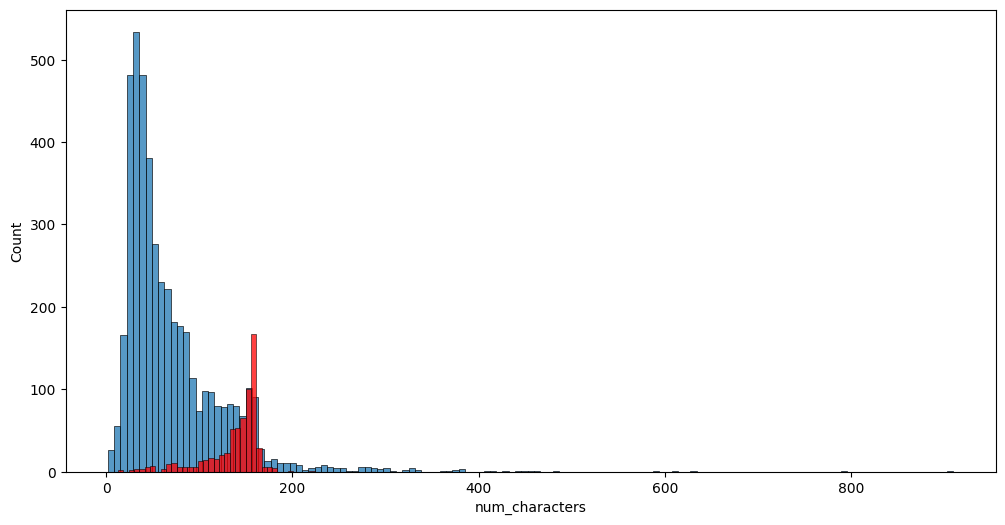

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_tokens', ylabel='Count'>

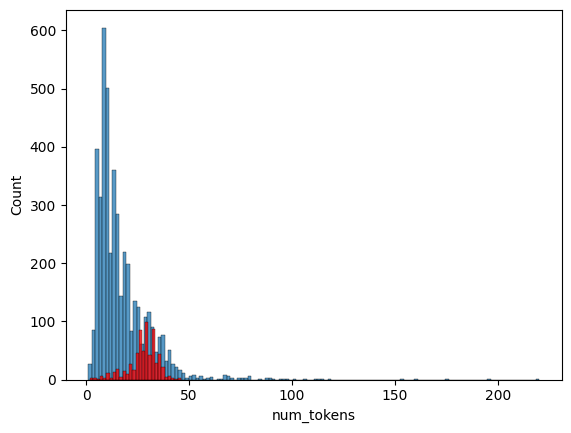

In [31]:
sns.histplot(df[df['Target']==0]['num_tokens'])
sns.histplot(df[df['Target']==1]['num_tokens'],color='red')

In [32]:
## after this graph we can see that there are some messages which are having more than
## 200 tokens from ham and spam 
## we hace to remove this outliers from our dataset


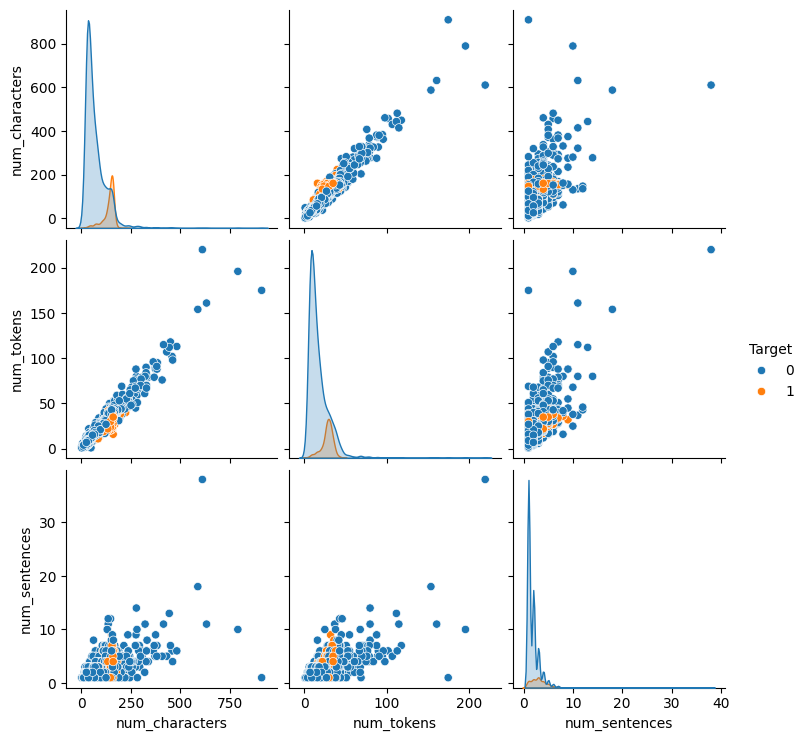

In [33]:
sns.pairplot(df,hue='Target')

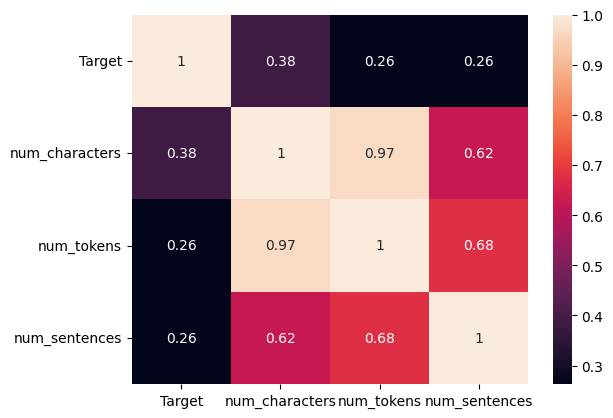

In [40]:
## correlation bt col
## corr works only with numerical columns
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

In [41]:
## we will keep num_characters col as it is having high corelation with target

# DATA PREPROCESSING
lowercase  
tokenization  
Removing special characters   
removing stop words and punctuation  
stemming

In [50]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'c:\\Users\\ASUS\\miniconda3\\nltk_data'
    - 'c:\\Users\\ASUS\\miniconda3\\share\\nltk_data'
    - 'c:\\Users\\ASUS\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) ## tokenize and gives list of words
    y=[]
    for i in text:
        if i.isalnum(): ## using alnum to remove special characters
            y.append(i)
    return y 

In [46]:
transform_text('Hi How are you 20%kiran')

['hi', 'how', 'are', 'you', '20', 'kiran']